GOWRI J
19BCS4034

# RandomForest Regressor

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\gowri\Downloads\TaxiFarePrediction\Taxi Fare Prediction\Dataset\TaxiFare.csv")

In [3]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.tail()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [5]:
df.shape

(50000, 8)

In [6]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [8]:
df.drop(["unique_id"],axis=1,inplace=True)

In [9]:
df.isna().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df["date_time_of_pickup"] = pd.to_datetime(df["date_time_of_pickup"], errors='coerce')

In [12]:
df.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [13]:
from math import radians, cos, sin, sqrt, asin
def distance(longitude1, latitude1, longitude2, latitude2):
    dist = []
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        dist.append(c)
       
    return dist

In [14]:
df['distance_in_km'] = distance(df['longitude_of_pickup'].to_numpy(),df['latitude_of_pickup'].to_numpy(),df['longitude_of_dropoff'].to_numpy(),df['latitude_of_dropoff'].to_numpy())

In [15]:
df = df.assign(hour = df.date_time_of_pickup.dt.hour, 
                         day = df.date_time_of_pickup.dt.day,
                        month = df.date_time_of_pickup.dt.month, 
                        year = df.date_time_of_pickup.dt.year, 
                        dayofweek = df.date_time_of_pickup.dt.dayofweek)

In [16]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance_in_km,hour,day,month,year,dayofweek
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,17,15,6,2009,0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,16,5,1,2010,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,0,18,8,2011,3
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,4,21,4,2012,5
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,7,9,3,2010,1


In [17]:
df.drop(["date_time_of_pickup","longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"],axis=1,inplace=True)

In [18]:
df.head()

,amount,no_of_passenger,distance_in_km,hour,day,month,year,dayofweek
0,4.5,1,1.030764,17,15,6,2009,0
1,16.9,1,8.450134,16,5,1,2010,1
2,5.7,2,1.389525,0,18,8,2011,3
3,7.7,1,2.799270,4,21,4,2012,5
4,5.3,1,1.999157,7,9,3,2010,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   amount           50000 non-null  float64
 1   no_of_passenger  50000 non-null  int64  
 2   distance_in_km   50000 non-null  float64
 3   hour             50000 non-null  int64  
 4   day              50000 non-null  int64  
 5   month            50000 non-null  int64  
 6   year             50000 non-null  int64  
 7   dayofweek        50000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 3.1 MB


In [20]:
df.describe()

,amount,no_of_passenger,distance_in_km,hour,day,month,year,dayofweek
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,1.667840,18.508946,13.489080,15.672040,6.273300,2011.739260,3.029980
std,9.685557,1.289195,355.564309,6.506935,8.660789,3.461157,1.862639,1.956936
min,-5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,1.000000,1.223146,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,8.500000,1.000000,2.120114,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,12.500000,2.000000,3.895570,19.000000,23.000000,9.000000,2013.000000,5.000000
max,200.000000,6.000000,8667.818812,23.000000,31.000000,12.000000,2015.000000,6.000000


<AxesSubplot:>

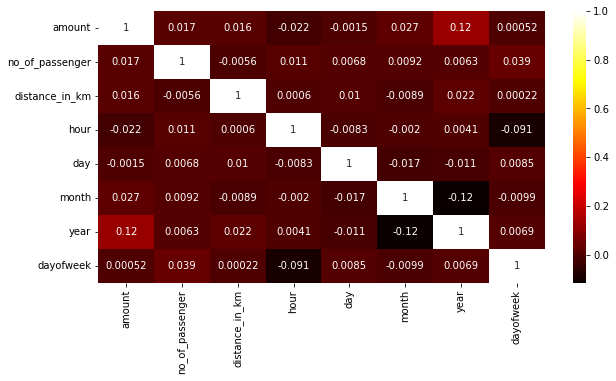

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
c=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(c,cmap='hot',annot=True)

<AxesSubplot:title={'center':'Count of Taxi trips in week days'}, xlabel='hour', ylabel='count'>

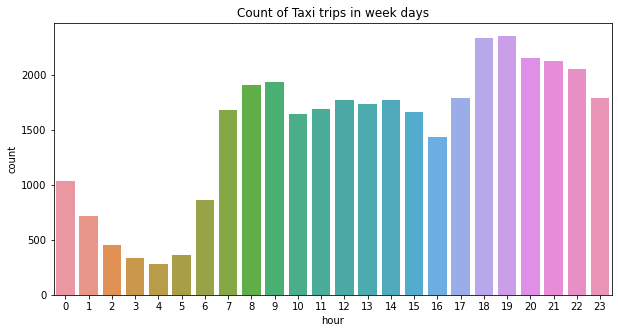

In [22]:
plt.figure(figsize=(10,5))
plt.title('Count of Taxi trips in week days')
sns.countplot(x='hour', data=df.loc[(df.dayofweek >= 0) & (df.dayofweek <=4)])

<AxesSubplot:title={'center':'Count of Taxi trips in week ends'}, xlabel='hour', ylabel='count'>

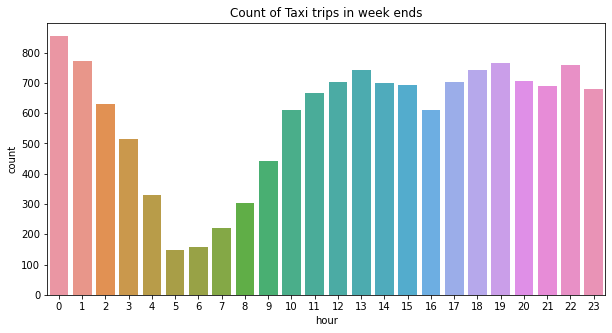

In [23]:
plt.figure(figsize=(10,5))
plt.title('Count of Taxi trips in week ends')
sns.countplot(x='hour', data=df.loc[(df.dayofweek >= 5) & (df.dayofweek <=6)])

In [24]:
x=df.iloc[:,:-1]

In [25]:
y=df.iloc[:,-1]

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [28]:
model=RandomForestRegressor()
obj=model.fit(xtrain, ytrain)

In [29]:
ypred=obj.predict(xtest)

In [30]:
from sklearn.metrics import mean_squared_error
print("Squared mean error = ",mean_squared_error(ytest, ypred))

Squared mean error =  3.7083804133333333


In [31]:
paramaters = [{'n_estimators': [ 80, 90],'min_samples_split': [7,10],'max_depth': [2, 5],'min_samples_leaf': [3,7]}]

In [32]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = paramaters, cv = 10)

In [ ]:
grid = grid.fit(xtrain, ytrain)
print(grid.best_params_)

In [ ]:
new_model = RandomForestRegressor(n_estimators = grid.best_params_.get('n_estimators'),
                                       max_depth = grid.best_params_.get('max_depth'),
                                       min_samples_leaf = grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

In [ ]:
new_model = new_model.fit(xtrain, ytrain)

In [ ]:
ypred=new_model.predict(xtest)

In [ ]:
from sklearn.metrics import metrics.mean_squared_error()
print("Accuracy = ",metrics.mean_squared_error(y_test, y_pred))